## 1 Intro

#### 1.1 Application of ML methods in life:
* Weather forecasting. Benefits: better predictions as a result of training on historical data.
* Cancer diagnostics. Benefits: ML algorithms can help identify suspicios MRI scans when traing on large datasets.
* Customer journey map improvement (Yandex Music). Benefits: learning more about customer preferences, better playlists (your own radio).
* Trading. Benefits: better predictions as a result of training on historical data.
* Rover's behavior (Yandex Delivery robot). Benefits: ability to detect barriers or capture humans to avoid collisions.

#### 1.2 Classification
1. Predict house price - regression
2. Predict whether a client returns a loan - classification (binary) if predicting the fact of returning a loan, regression if predicting bank losses.
3. Predict when a patient needs to take medicine - classification.
4. Choose what medicine out of available a patient should take - classification (choosing between grops of meds based on the possible effects from the treatment).
5. Choose segment of clients for a promo communication - classification.
6. Recognition of defective products on the production line (based on photo scans) - classification.
7. Decide how to place products on a shelf in a store - classification.
8. Search sites for input text query - classification.
9. Split customers of a store into segments to understand differences of their behavior - classification.
10. Detect anomaly in site traffic - regression (dynamics in data).
11. Weather forecasting - regression.
12. Cancer diagnostics - classification.
13. Customer journey map improvement - classification (learning more about customer preferences).
14. Trading - regression.
15. Rover's behavior - classification.

#### 1.3 Difference between multiclass and multilabel
Multiclass: when we divide our dataset in 3+ groups and assign each observation to ONE of the groups (classes).

Multilabel: when we assign any observation to MULTIPLE groups (label them).

#### 1.4 Classification vs. Regression Q
Regression (we're predicting a price value).

## 2. Introduction to Data Analysis

### 2.1 Import libraries

In [239]:
# 2.1 Libraries
!pip install pandas numpy scikit-learn lightgbm scipy statsmodels matplotlib seaborn

In [240]:
import pandas as pd
import numpy as np

## Data load

In [241]:
# 2.2 
df = pd.read_json('data/train.json')
print(df.head())

    bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6       

In [242]:
# 2.3 Size of data
print(f"Data shape. Rows, columns: \n{df.shape}")

Data shape. Rows, columns: 
(49352, 15)


In [243]:
# 2.4 List of columns
print(f"List of columns: \n{list(df.columns)}")

List of columns: 
['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']


### Target column: 'price'

In [244]:
# 2.5 Quick analysis of the data: the info(), describe(), corr() methods
print(df.info())
print()
print(df.describe())
print()
print(df.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB
None

         bathrooms      bedrooms      latitud

### Explaining the results of the output above:

We're looking at a set of numerical data with 49,352 listings. No missing data, which is not typical for the real world. The data has probably been preprocessed. 

There are more relatively cheap apartments on the market; the distribution is probably right-skewed. Looking at the max price of USD 4.5 million, one might suspect there's an outlier. 

Based on the latitude-longitude check, it's New York. 0.000000 might represent listings with no geographical data. Longitude and latitude have the strongest negative correlation. This occurs because the north-western hemisphere has positive latitude coordinates and negative longitude coordinates in general. 

An average property having 1.2 bathrooms and 1.5 bedrooms signals a lean toward 1-2 bedroom apartments. However, more bedrooms don't equal more bathrooms immediately, as 1.2 is clearly insufficient to declare a propensity toward having more bathrooms.

In [245]:
# Check foe empty columns
empty_cols = df.isnull().all().sum()
print(f"Number of empty columns: {empty_cols}")

# Q
print("\nQ: Are there any empty columns?")
if empty_cols > 0:
    print(f"A: Yes, there are {empty_cols} empty columns")
else:
    print("A: No, there are no empty columns")

Number of empty columns: 0

Q: Are there any empty columns?
A: No, there are no empty columns


In [246]:
# 2.6 Dataframe with selected features
selected_features = ['bathrooms', 'bedrooms', 'interest_level']
target_col = 'price'

new_df = df[selected_features + [target_col]]
print("New dataframe:")
print(new_df.head())

New dataframe:
    bathrooms  bedrooms interest_level  price
4         1.0         1         medium   2400
6         1.0         2            low   3800
9         1.0         2         medium   3495
10        1.5         3         medium   3000
15        1.0         0            low   2795


## 3. Statistical Data Analysis

#### Mean / Median / Mode / Variance / Standard Deviation

In [247]:
print(f"Mean price: USD {new_df['price'].mean():.4f}")
print(f"Median price: USD {new_df['price'].median():.4f}")
print(f"Price mode: USD {new_df['price'].mode()[0]:.4f}")
print(f"Variance for price: USD {new_df['price'].var():.4f}")
print(f"Price std deviation: USD {new_df['price'].std():.4f}")

Mean price: USD 3830.1740
Median price: USD 3150.0000
Price mode: USD 2500.0000
Variance for price: USD 486946569.9727
Price std deviation: USD 22066.8659


In [248]:
stats = new_df[selected_features + [target_col]].describe()
print(stats)

         bathrooms      bedrooms         price
count  49352.00000  49352.000000  4.935200e+04
mean       1.21218      1.541640  3.830174e+03
std        0.50142      1.115018  2.206687e+04
min        0.00000      0.000000  4.300000e+01
25%        1.00000      1.000000  2.500000e+03
50%        1.00000      1.000000  3.150000e+03
75%        1.00000      2.000000  4.100000e+03
max       10.00000      8.000000  4.490000e+06


# 3.3 Target analysis
## 3.3.1 Histogram

In [249]:
print(new_df.columns.tolist())

['bathrooms', 'bedrooms', 'interest_level', 'price']


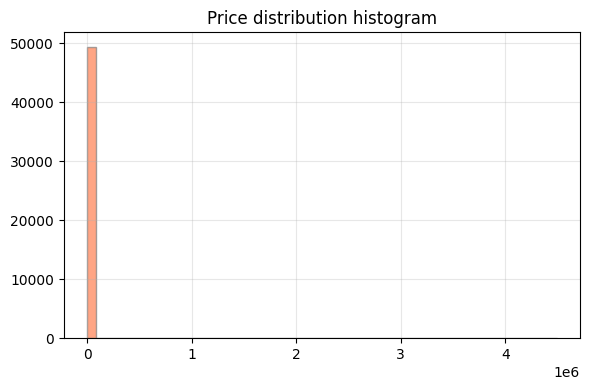

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for price distribution
plt.figure(figsize=(6, 4))
plt.hist(new_df['price'], bins=50, alpha=0.7, color='coral', edgecolor='grey')
plt.title('Price distribution histogram')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [251]:
# Distribution of the target stats
print("BASIC STATISTICS")
print(f"Min: {new_df['price'].min()}")
print(f"Max: {new_df['price'].max()}")
print(f"Mean: {new_df['price'].mean():.2f}")
print(f"Median: {new_df['price'].median():.2f}")
print(f"Std: {new_df['price'].std():.2f}")

# Most expensive apartments
top_10_apts = new_df['price'].nlargest(10).reset_index()
top_10_apts.columns = ['ID', 'Price']
print("\nTOP 10 MOST EXPENSIVE APTS")
print(top_10_apts)

BASIC STATISTICS
Min: 43
Max: 4490000
Mean: 3830.17
Median: 3150.00
Std: 22066.87

TOP 10 MOST EXPENSIVE APTS
       ID    Price
0   32611  4490000
1   12168  1150000
2   55437  1070000
3   57803  1070000
4  123877   135000
5    4620   111111
6   91709   100000
7   54148    90000
8  116586    85000
9   96905    80000


## 3.3.2 Boxplot

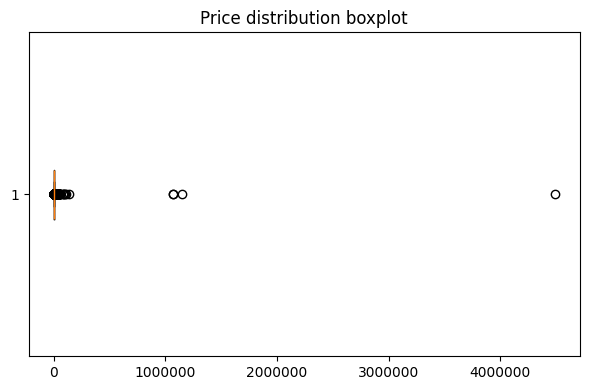

Number of outliers: 2788
Percentage of outliers: 5.65%


In [252]:
plt.figure(figsize=(6, 4))
plt.boxplot(new_df['price'], vert=False)
plt.title('Price distribution boxplot')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# Outliers
Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_df[(new_df['price'] < lower_bound) | (new_df['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(new_df)*100:.2f}%")

## 3.3.3

In [253]:
# Deleting rows outside the 1st and 99th percentiles
p1 = new_df['price'].quantile(0.01)
p99 = new_df['price'].quantile(0.99)

print(f"1st percentile: USD {p1:,.0f}")
print(f"99th percentile: USD {p99:,.0f}")

cleaned_df = new_df[(new_df['price'] >= p1) & (new_df['price'] <= p99)]

print(f"\nOriginal dataset length: {len(new_df):,} apartments")
print(f"After removing 1st and 99th: {len(cleaned_df):,} apartments") 
print(f"Removed: {len(new_df) - len(cleaned_df):,} apts, which correspond to {((len(new_df) - len(cleaned_df))/len(new_df)*100):.1f}% of the original dataset")

1st percentile: USD 1,475
99th percentile: USD 13,000

Original dataset length: 49,352 apartments
After removing 1st and 99th: 48,379 apartments
Removed: 973 apts, which correspond to 2.0% of the original dataset


## 3.3.4

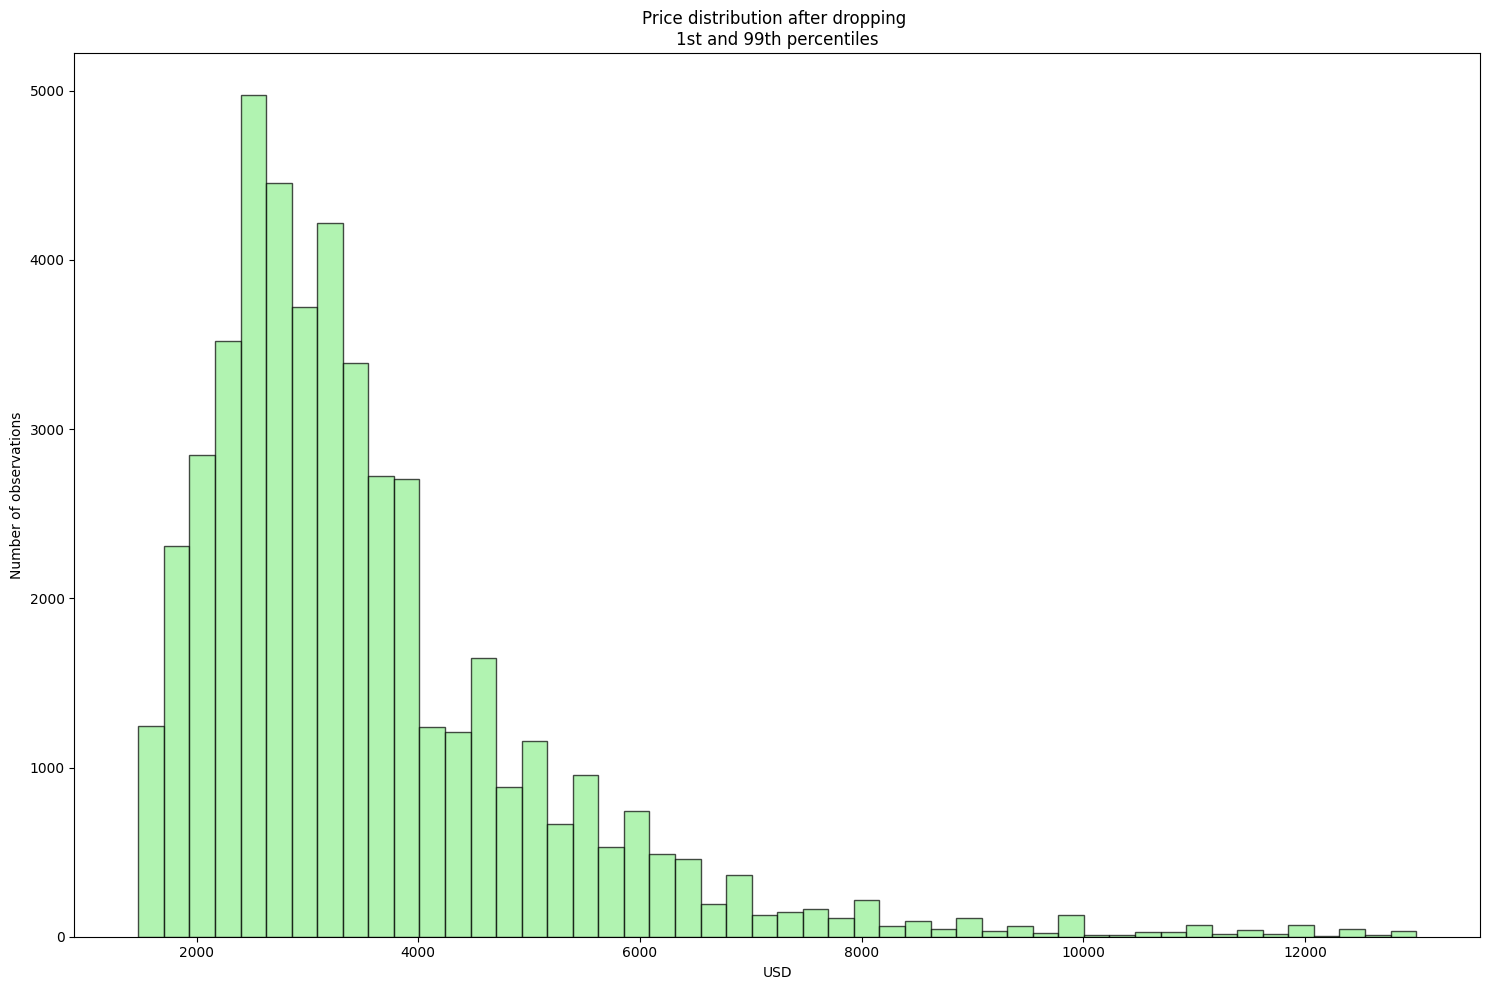

ORIGINAL VS CLEANED

Original data
Mean: USD 3830.17
Median: USD 3150.00
Std deviation: USD 22066.87

Cleaned data
Mean: USD 3538.64
Median: USD 3150.00
Std deviation: USD 1597.66

Std deviation dropped by 92.76%

Distribution shape improvement
Original skewness: 177.694
Cleaned skewness: 2.031

Skewness improved by 98.86%


In [254]:
# Hisrogram for price updated (1st and 99th percentiles deleted)
fig, axes = plt.subplots(figsize=(15, 10))

axes.hist(cleaned_df['price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes.set_title(f'Price distribution after dropping \n1st and 99th percentiles')
axes.set_xlabel('USD')
axes.set_ylabel('Number of observations')

plt.tight_layout()
plt.show()

# Stats before and after cleaning
print("ORIGINAL VS CLEANED")
print("\nOriginal data")
print(f"Mean: USD {new_df['price'].mean():.2f}")
print(f"Median: USD {new_df['price'].median():.2f}")
print(f"Std deviation: USD {new_df['price'].std():.2f}")

print("\nCleaned data")
print(f"Mean: USD {cleaned_df['price'].mean():.2f}")
print(f"Median: USD {cleaned_df['price'].median():.2f}")  
print(f"Std deviation: USD {cleaned_df['price'].std():.2f}")
print()
std_dev_1 = new_df['price'].std()
std_dev_2 = cleaned_df['price'].std()
std_dev_shift = (std_dev_2 - std_dev_1)/std_dev_1*100
if std_dev_shift < 0:
    print(f"Std deviation dropped by {abs(std_dev_shift):.2f}%")
if std_dev_shift > 0:
    print(f"Std deviation increased by {std_dev_shift:.2f}%")

print(f"\nDistribution shape improvement")
print(f"Original skewness: {new_df['price'].skew():.3f}")
print(f"Cleaned skewness: {cleaned_df['price'].skew():.3f}")
print()
skw_1 = new_df['price'].skew()
skw_2 = cleaned_df['price'].skew()
skw_shift = (skw_2 - skw_1)/skw_1*100
if skw_shift > 0:
    print(f"Skewness deteriorated by {skw_shift:.2f}%")
if skw_shift < 0:
    print(f"Skewness improved by {abs(skw_shift):.2f}%")

### Explaining the results of the output above:
There's a slight decline in the mean value.

The median didn't change, because we only removed the "tail" values.

The most dramatic change is in standard deviation, which dropped by 92,8% after removing the outliers.

The original data was extremely right-skewed (177.7). After cleaning, the skewness improved by 98.9%, making the distribution much closer to normal (2.03 still slightly right-skewed).

## 3.4 Characteristics Analysis

### 3.4.1

In [255]:
print("INTEREST LEVEL DATA TYPE:")
print(new_df['interest_level'].dtype)

INTEREST LEVEL DATA TYPE:
object


### 3.4.2

In [256]:
print("VALUES")
print(f"Number of unique values: {new_df['interest_level'].nunique()}")
print("VALUES-values:")
print(new_df['interest_level'].value_counts().index.tolist())

print("\nVALUE COUNTS")
print(new_df['interest_level'].value_counts().head())

VALUES
Number of unique values: 3
VALUES-values:
['low', 'medium', 'high']

VALUE COUNTS
interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64


### 3.4.3

In [257]:
# 3.4.3 = Encode
cleaned_df = cleaned_df.copy()

interest_mapping = {
    'low': 0,
    'medium': 1, 
    'high': 2
}

cleaned_df['interest_level_encoded'] = cleaned_df['interest_level'].map(interest_mapping)

print("VALUES ENCODED")
print("Original vs. Encoded:")
comparison = cleaned_df[['interest_level', 'interest_level_encoded']].value_counts().sort_index()
print(comparison)

VALUES ENCODED
Original vs. Encoded:
interest_level  interest_level_encoded
high            2                          3566
low             0                         33697
medium          1                         11116
Name: count, dtype: int64


### 3.4.4

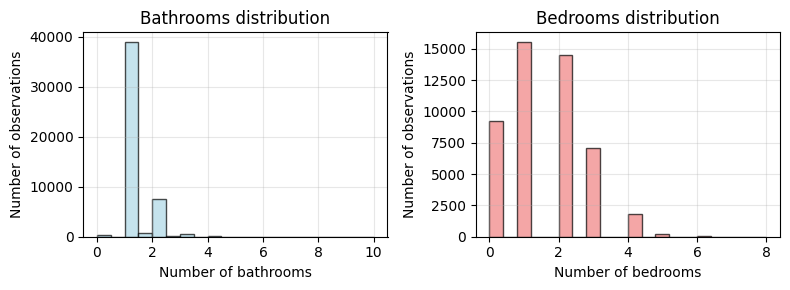

In [258]:
# 3.4.4 = Histograms for bathrooms and bedrooms
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

## Histogram-1. Bathrooms
axes[0].hist(cleaned_df['bathrooms'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Bathrooms distribution')
axes[0].set_xlabel('Number of bathrooms')
axes[0].set_ylabel('Number of observations')
axes[0].grid(True, alpha=0.3)

## Histogram-2. Bedrooms
axes[1].hist(cleaned_df['bedrooms'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Bedrooms distribution')
axes[1].set_xlabel('Number of bedrooms')
axes[1].set_ylabel('Number of observations')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Q: Are there any outliers?
A: Looking at the graphs, one can see no outliers.

## 3.5. Complex analysis

### 3.5.1

In [259]:
# Correlation matrix
correlation_matrix = cleaned_df[['bathrooms', 'bedrooms', 'interest_level_encoded', 'price']].corr()
correlation_matrix = correlation_matrix.rename(index={'interest_level_encoded': 'interest_level'}, columns={'interest_level_encoded': 'interest_level'})
correlation_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


### 3.5.2

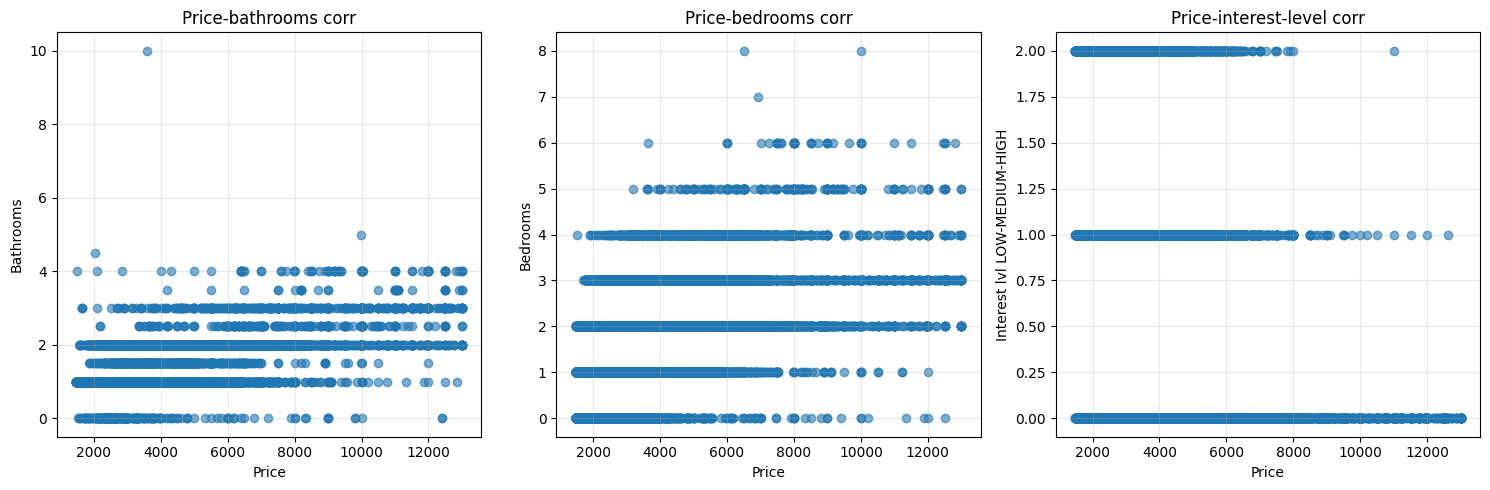

In [260]:
# 3.5.2 = Scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

## Plot-1. Price-bathrooms correlation
axes[0].scatter(cleaned_df['price'], cleaned_df['bathrooms'], alpha=0.6)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Bathrooms')
axes[0].set_title('Price-bathrooms corr')
axes[0].grid(True, alpha=0.3)

## Plot-2. Price-bedrooms correlation
axes[1].scatter(cleaned_df['price'], cleaned_df['bedrooms'], alpha=0.6)
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Bedrooms')
axes[1].set_title('Price-bedrooms corr')
axes[1].grid(True, alpha=0.3)

## Plot-3. Price-interest-level correlation
axes[2].scatter(cleaned_df['price'], cleaned_df['interest_level_encoded'], alpha=0.6)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Interest lvl LOW-MEDIUM-HIGH')
axes[2].set_title('Price-interest-level corr')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Creating Features

### 4.1 Squared featured

In [261]:
cleaned_df['bathrooms_squared'] = cleaned_df['bathrooms'] ** 2
cleaned_df['bedrooms_squared'] = cleaned_df['bedrooms'] ** 2
cleaned_df['interest_level_squared'] = cleaned_df['interest_level_encoded'] ** 2

In [262]:
# Correlation matrix. New features
correlation_matrix_2 = cleaned_df[['bathrooms', 'bedrooms', 'interest_level_encoded', 'price', 'bathrooms_squared', 'bedrooms_squared', 'interest_level_squared']].corr()
correlation_matrix_2

,bathrooms,bedrooms,interest_level_encoded,price,bathrooms_squared,bedrooms_squared,interest_level_squared
bathrooms,1.000000,0.517574,-0.063635,0.671943,0.956023,0.548760,-0.059410
bedrooms,0.517574,1.000000,0.050654,0.545948,0.478817,0.928277,0.039511
interest_level_encoded,-0.063635,0.050654,1.000000,-0.200111,-0.068558,0.046340,0.944013
price,0.671943,0.545948,-0.200111,1.000000,0.648486,0.543406,-0.182672
bathrooms_squared,0.956023,0.478817,-0.068558,0.648486,1.000000,0.522227,-0.062240
bedrooms_squared,0.548760,0.928277,0.046340,0.543406,0.522227,1.000000,0.035718
interest_level_squared,-0.059410,0.039511,0.944013,-0.182672,-0.062240,0.035718,1.000000


### Q: Are the new features more correlated with the target than the basic features?
A: No, the new features are not more correlated with the target.

In [263]:
from sklearn.preprocessing import PolynomialFeatures

# Training data == data cleaned and processed before
train_features = cleaned_df[['bathrooms', 'bedrooms']].copy()
train_target = cleaned_df['price'].copy()

# Data load (test.json)
test_df = pd.read_json('data/test.json')

print(f"Test data shape: {test_df.shape}")
print(f"Test data columns: {test_df.columns.tolist()}")
print("\nTest data info:")
print(test_df.info())

# Checking if target column ('price') is present in the new dataset
if 'price' in test_df.columns:
    print("\nStatus: Target columns 'price' is present in the dataset.")
else:
    print("\nStatus: Target columns 'price' not found in the dataset.")

# Extracting features
test_features = test_df[['bathrooms', 'bedrooms']].copy()

# Cleaning the data
print("\nTEST DATA BEFORE CLEANING")
print(f"Test data shape: {test_df.shape}")
print(f"Price range: USD {test_df['price'].min()} - USD {test_df['price'].max()}")

# Removing outliers (outliers == 1st and 99th percentiles)
Q1_test = test_df['price'].quantile(0.01)
Q99_test = test_df['price'].quantile(0.99)
test_cleaned = test_df[(test_df['price'] >= Q1_test) & (test_df['price'] <= Q99_test)]

print("\nTEST DATA AFTER CLEANING")
print(f"Cleaned test shape: {test_cleaned.shape}")
print(f"Removed: {len(test_df) - len(test_cleaned)} rows")
print(f"Price range: USD {test_cleaned['price'].min()} - USD {test_cleaned['price'].max()}")

# Extracting cleaned features and target
test_features = test_cleaned[['bathrooms', 'bedrooms']].copy()
test_target = test_cleaned['price'].copy()

print(f"\nCleaned test features shape: {test_features.shape}")
print("Cleaned test features info:")
print(test_features.describe())

# PolynomialFeatures for cleaned datasets
poly_features = PolynomialFeatures(degree=10)

# Fitting and transforming
train_poly = poly_features.fit_transform(train_features)
test_poly = poly_features.transform(test_features)

print(f"\nOriginal features: {train_features.shape[1]}")
print(f"Polynomial features: {train_poly.shape[1]}")
print(f"Training polynomial shape: {train_poly.shape}")
print(f"Test polynomial shape: {test_poly.shape}")

# Summary
print(f"\nDATASET SUMMARY")
print(f"Training data: {train_features.shape[0]} samples")
print(f"Test data: {test_features.shape[0]} samples")
print(f"Features: {train_features.shape[1]} original to {train_poly.shape[1]} polynomial")

Test data shape: (74659, 14)
Test data columns: ['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address']

Test data info:
<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object

## 5. Models

In [264]:
# Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 5.1 Results tables

In [265]:
# 5.1 Empty DataFrames for the results tables
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

print("Status: Results tables created.")

Status: Results tables created.


### 5.2 Linear regression

In [266]:
print("Model name: LINEAR REGRESSION")

# Model initialization
lr_model = LinearRegression()

# Fitting model
lr_model.fit(train_poly, train_target)

# Predictions
train_pred_lr = lr_model.predict(train_poly)
test_pred_lr = lr_model.predict(test_poly)

# Metrics: MAE and RMSE
train_mae_lr = mean_absolute_error(train_target, train_pred_lr)
test_mae_lr = mean_absolute_error(test_target, test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(train_target, train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(test_target, test_pred_lr))

# Results tables
result_MAE.loc[len(result_MAE)] = ['linear_regression', train_mae_lr, test_mae_lr]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', train_rmse_lr, test_rmse_lr]

print(f"Train MAE: USD{train_mae_lr:.4f}. Test MAE: USD {test_mae_lr:.4f}")
print(f"Train RMSE: USD {train_rmse_lr:.4f}. Test RMSE: USD {test_rmse_lr:.4f}")

Model name: LINEAR REGRESSION
Train MAE: USD756.0403. Test MAE: USD 14774492409252344.0000
Train RMSE: USD 1077.5664. Test RMSE: USD 3997749350602560000.0000


### 5.3 Decision tree

In [267]:
print("Model name: DECISION TREE")

# Model initialization
dt_model = DecisionTreeRegressor(random_state=21)

# Fitting model
dt_model.fit(train_poly, train_target)

# Predictions
train_pred_dt = dt_model.predict(train_poly)
test_pred_dt = dt_model.predict(test_poly)

# Metrics: MAE and RMSE
train_mae_dt = mean_absolute_error(train_target, train_pred_dt)
test_mae_dt = mean_absolute_error(test_target, test_pred_dt)
train_rmse_dt = np.sqrt(mean_squared_error(train_target, train_pred_dt))
test_rmse_dt = np.sqrt(mean_squared_error(test_target, test_pred_dt))

# Results tables
result_MAE.loc[len(result_MAE)] = ['decision_tree', train_mae_dt, test_mae_dt]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', train_rmse_dt, test_rmse_dt]

print(f"Train MAE: USD {train_mae_dt:.4f}. Test MAE: USD {test_mae_dt:.4f}")
print(f"Train RMSE: USD {train_rmse_dt:.4f}. Test RMSE: USD {test_rmse_dt:.4f}")

Model name: DECISION TREE
Train MAE: USD 756.0447. Test MAE: USD 759.4423
Train RMSE: USD 1077.4836. Test RMSE: USD 1081.5628


### 5.4 Naive

In [268]:
print("Model name: NAIVE MEAN AND MEDIAN")

# Calculating mean and median, training data
train_mean = train_target.mean()
train_median = train_target.median()

print(f"Training mean: USD {train_mean:.2f}")
print(f"Training median: USD {train_median:.2f}")

## Naive mean
train_pred_mean = np.full(len(train_target), train_mean)
test_pred_mean = np.full(len(test_target), train_mean)

train_mae_mean = mean_absolute_error(train_target, train_pred_mean)
test_mae_mean = mean_absolute_error(test_target, test_pred_mean)
train_rmse_mean = np.sqrt(mean_squared_error(train_target, train_pred_mean))
test_rmse_mean = np.sqrt(mean_squared_error(test_target, test_pred_mean))

result_MAE.loc[len(result_MAE)] = ['naive_mean', train_mae_mean, test_mae_mean]
result_RMSE.loc[len(result_RMSE)] = ['naive_mean', train_rmse_mean, test_rmse_mean]

## Naive median
train_pred_median = np.full(len(train_target), train_median)
test_pred_median = np.full(len(test_target), train_median)

train_mae_median = mean_absolute_error(train_target, train_pred_median)
test_mae_median = mean_absolute_error(test_target, test_pred_median)
train_rmse_median = np.sqrt(mean_squared_error(train_target, train_pred_median))
test_rmse_median = np.sqrt(mean_squared_error(test_target, test_pred_median))

result_MAE.loc[len(result_MAE)] = ['naive_median', train_mae_median, test_mae_median]
result_RMSE.loc[len(result_RMSE)] = ['naive_median', train_rmse_median, test_rmse_median]

print(f"Mean model. Train MAE: USD {train_mae_mean:.4f}. Test MAE: USD {test_mae_mean:.4f}")
print(f"Median model. Train MAE: USD {train_mae_median:.4f}. Test MAE: USD {test_mae_median:.4f}")

Model name: NAIVE MEAN AND MEDIAN
Training mean: USD 3538.64
Training median: USD 3150.00
Mean model. Train MAE: USD 1139.1925. Test MAE: USD 1137.3399
Median model. Train MAE: USD 1086.2105. Test MAE: USD 1084.2746


### 5.5 Comparing results

In [269]:
print("COMPARING THE RESULTS")

print("\nMAE Results:")
print(result_MAE.round(2))

print("\nRMSE Results:")
print(result_RMSE.round(2))

# Best models
best_test_mae = result_MAE['test'].min()
best_mae_model = result_MAE.loc[result_MAE['test'].idxmin(), 'model']

best_test_rmse = result_RMSE['test'].min()
best_rmse_model = result_RMSE.loc[result_RMSE['test'].idxmin(), 'model']

print(f"\nBest model by test MAE: {best_mae_model} (USD {best_test_mae:.2f})")
print(f"Best model by test RMSE: {best_rmse_model} (USD {best_test_rmse:.2f})")

# Overfitting check
print("\nOverfitting analysis:")
for i in range(len(result_MAE)):
    model = result_MAE.iloc[i]['model']
    train_score = result_MAE.iloc[i]['train']
    test_score = result_MAE.iloc[i]['test']
    gap = test_score - train_score
    
    if gap > 100:  # Significant gap
        print(f"{model}: Large gap (USD {gap:.0f}) - possible overfitting")
    elif gap > 0:
        print(f"{model}: Small gap (USD {gap:.0f}) - good generalization")
    else:
        print(f"{model}: Test better than train (USD {abs(gap):.0f})")

COMPARING THE RESULTS

MAE Results:
               model    train          test
0  linear_regression   756.04  1.477449e+16
1      decision_tree   756.04  7.594400e+02
2         naive_mean  1139.19  1.137340e+03
3       naive_median  1086.21  1.084270e+03

RMSE Results:
               model    train          test
0  linear_regression  1077.57  3.997749e+18
1      decision_tree  1077.48  1.081560e+03
2         naive_mean  1597.65  1.590100e+03
3       naive_median  1644.24  1.635380e+03

Best model by test MAE: decision_tree (USD 759.44)
Best model by test RMSE: decision_tree (USD 1081.56)

Overfitting analysis:
linear_regression: Large gap (USD 14774492409251588) - possible overfitting
decision_tree: Small gap (USD 3) - good generalization
naive_mean: Test better than train (USD 2)
naive_median: Test better than train (USD 2)


## 5.6 Addidional Task

In [270]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [271]:
# Original full training data not filtered
df_original = pd.read_json('data/train.json')
print("Original dataset shape:", df_original.shape)  
print("Original columns:", df_original.columns.tolist())

Original dataset shape: (49352, 15)
Original columns: ['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']


In [272]:
# Removing outliers
Q1_orig = df_original['price'].quantile(0.01)
Q99_orig = df_original['price'].quantile(0.99)
df = df_original[(df_original['price'] >= Q1_orig) & (df_original['price'] <= Q99_orig)].copy()

print(f"After price filtering: {df.shape[0]} apartments")

After price filtering: 48379 apartments


In [273]:
print("\nFirst few rows of key columns:")
print(df[['features', 'photos', 'price']].head())


First few rows of key columns:
                                             features  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   
6   [Doorman, Elevator, Laundry in Building, Dishw...   
9   [Doorman, Elevator, Laundry in Building, Laund...   
10                                                 []   
15  [Doorman, Elevator, Fitness Center, Laundry in...   

                                               photos  price  
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400  
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800  
9   [https://photos.renthop.com/2/7158677_c897a134...   3495  
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000  
15  [https://photos.renthop.com/2/7225292_901f1984...   2795  


### Features to analyze: photo count, location, and amenities

In [274]:
# Feature 1. Photo count feature
print("PHOTO COUNT FEATURE")

df['photo_count'] = df['photos'].apply(lambda x: len(x) if isinstance(x, list) else 0)
print("Photo count statistics:")
print(df['photo_count'].describe())
print(f"Apartments with 0 photos: {sum(df['photo_count'] == 0)}")
print(f"Max photos: {df['photo_count'].max()}")

# Photo-price correlation 
photo_price_corr = df[['photo_count', 'price']].corr().loc['photo_count', 'price']
print(f"Photo count correlation with price: {photo_price_corr:.4f}")

PHOTO COUNT FEATURE
Photo count statistics:
count    48379.000000
mean         5.610079
std          3.626828
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         68.000000
Name: photo_count, dtype: float64
Apartments with 0 photos: 3512
Max photos: 68
Photo count correlation with price: 0.1516


In [275]:
# Feature 2. Amenity features
print("AMENITY FEATURES")

## Checker function:
def has_amenity(features_list, amenity):
    if not isinstance(features_list, list):
        return 0
    return 1 if amenity in features_list else 0

# Amenity features:
df['has_dishwasher'] = df['features'].apply(lambda x: has_amenity(x, 'Dishwasher'))
df['allows_dogs'] = df['features'].apply(lambda x: has_amenity(x, 'Dogs Allowed'))
df['allows_cats'] = df['features'].apply(lambda x: has_amenity(x, 'Cats Allowed'))
df['has_doorman'] = df['features'].apply(lambda x: has_amenity(x, 'Doorman'))
df['has_elevator'] = df['features'].apply(lambda x: has_amenity(x, 'Elevator'))

amenities = ['has_dishwasher', 'allows_dogs', 'allows_cats', 'has_doorman', 'has_elevator']
print("Amenities breakdown:")
for amenity in amenities:
    count = df[amenity].sum()
    percentage = (count / len(df)) * 100
    print(f"{amenity}: {count} apartments ({percentage:.1f}%)")

# Amenity-price correlations 
print("\nAmenity corr. with price:")
for amenity in amenities:
    corr = df[[amenity, 'price']].corr().loc[amenity, 'price']
    print(f"{amenity}: {corr:.4f}")

AMENITY FEATURES
Amenities breakdown:
has_dishwasher: 20095 apartments (41.5%)
allows_dogs: 21662 apartments (44.8%)
allows_cats: 23148 apartments (47.8%)
has_doorman: 20497 apartments (42.4%)
has_elevator: 25398 apartments (52.5%)

Amenity corr. with price:
has_dishwasher: 0.2255
allows_dogs: 0.0644
allows_cats: 0.0561
has_doorman: 0.2819
has_elevator: 0.2157


In [276]:
# Feature 3. Location features
print("LOCATION FEATURES")

# Unusual location (non-NYC coordinates)
print("Data quality check:")
print(f"Apartments with lat=0 or lon=0: {((df['latitude'] == 0) | (df['longitude'] == 0)).sum()}")
nyc_bounds = ((df['latitude'] >= 40.4) & (df['latitude'] <= 41.0) & 
              (df['longitude'] >= -74.3) & (df['longitude'] <= -73.7))
outside_nyc = len(df) - nyc_bounds.sum()
print(f"Outside NYC: {outside_nyc}")

df_clean = df[nyc_bounds].copy()
print(f"Clean dataset size: {len(df_clean)} (removed {len(df) - len(df_clean)} rows)")

# Manhattan indicator
df_clean['is_manhattan'] = ((df_clean['latitude'] >= 40.700) & (df_clean['latitude'] <= 40.880) & 
                           (df_clean['longitude'] >= -74.020) & (df_clean['longitude'] <= -73.910)).astype(int)

manhattan_count = df_clean['is_manhattan'].sum()
print(f"Manhattan apartments: {manhattan_count} ({(manhattan_count/len(df_clean)*100):.1f}%)")

# Manhattan price analysis
manhattan_prices = df_clean.groupby('is_manhattan')['price'].agg(['count', 'mean', 'std']).round(2)
print("Manhattan vs other areas:")
print(manhattan_prices)

LOCATION FEATURES
Data quality check:
Apartments with lat=0 or lon=0: 11
Outside NYC: 41
Clean dataset size: 48338 (removed 41 rows)
Manhattan apartments: 43916 (90.9%)
Manhattan vs other areas:
              count     mean      std
is_manhattan                         
0              4422  2558.16   887.42
1             43916  3637.80  1619.81


In [277]:
# Feature-price corr.
print("FEATURE-PRICE CORRELATIONS ")

correlation_features = ['bathrooms', 'bedrooms', 'photo_count', 'is_manhattan'] + amenities

correlations = df_clean[['price'] + correlation_features].corr()['price'].sort_values(ascending=False)
print("Feature correlations with price:")
for feature, corr in correlations.items():
    if feature != 'price':
        print(f"{feature}: {corr:.4f}")

FEATURE-PRICE CORRELATIONS 
Feature correlations with price:
bathrooms: 0.6722
bedrooms: 0.5459
has_doorman: 0.2820
has_dishwasher: 0.2255
has_elevator: 0.2158
is_manhattan: 0.1948
photo_count: 0.1522
allows_dogs: 0.0642
allows_cats: 0.0559
